In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customer_churn = pd.read_csv('customer_churn.csv')
display(customer_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn['Churn'].value_counts(dropna=False)


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes': 1, 'No': 0})

In [6]:
customer_churn['Churn'].value_counts(dropna=False)


Churn
0    5174
1    1869
Name: count, dtype: int64

In [7]:
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [8]:
X = customer_churn[['tenure','SeniorCitizen','MonthlyCharges']]
y= customer_churn['Churn']

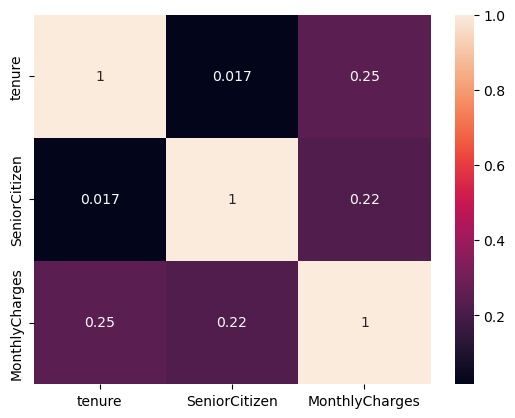

In [9]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [11]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [12]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [14]:
LR.predict_proba(X_train_scaled)

array([[0.83053024, 0.16946976],
       [0.8895592 , 0.1104408 ],
       [0.66553972, 0.33446028],
       ...,
       [0.98794371, 0.01205629],
       [0.25880337, 0.74119663],
       [0.7962228 , 0.2037772 ]])

In [15]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

In [16]:
logits

array([ 1.5893898 ,  2.08624645,  0.6880802 , ...,  4.40603937,
       -1.05219735,  1.36285178])

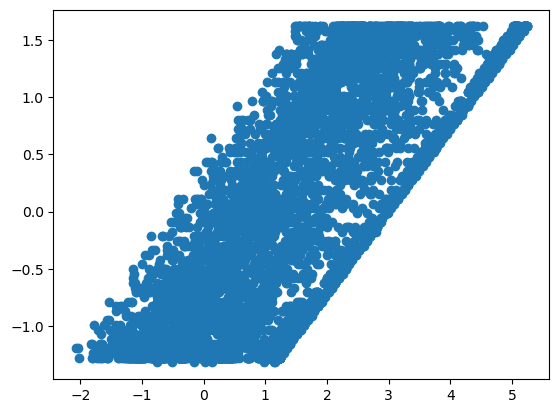

In [17]:
plt.scatter(logits,X_train_scaled['tenure'])

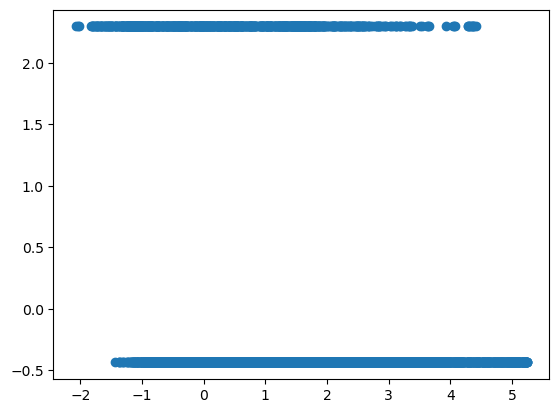

In [18]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

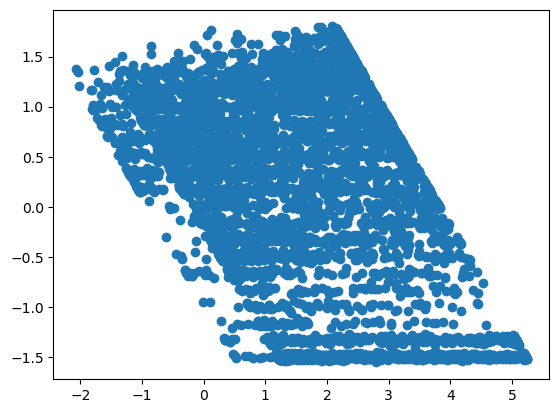

In [19]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

In [20]:
Churn_c = customer_churn['Churn'].value_counts()
Churn_c

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

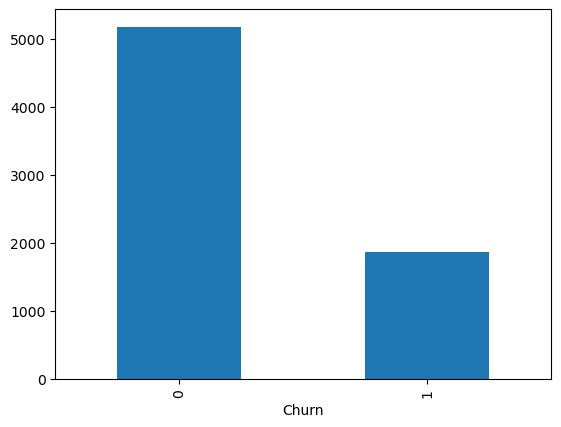

In [21]:
Churn_c.plot(kind = 'bar')

In [22]:
5174 /(5174+1869)
#the selected variables (tenure, senior citizen, monthly charges) are highly correlated with the churn of a customer. and also there were sufficient data for the choosed variables 

0.7346301292063041

In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [26]:
from sklearn.utils import resample

In [27]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0.0
1,0.883210,2.296336,0.017840,NaN
2,-1.196572,-0.435476,-0.819594,1.0
3,1.168670,-0.435476,-1.483535,0.0
4,-0.829552,-0.435476,0.658427,1.0


In [28]:
churn_no = train[train['Churn']==0]
churn_yes = train[train['Churn']==1]

In [29]:
display(churn_no.shape)
display(churn_yes.shape)

(3876, 4)

(1406, 4)

In [30]:
churn_yes_oversampled = resample(churn_yes,
                                    replace=True, 
                                    n_samples = len(churn_no),
                                    random_state=0)

In [31]:
display(churn_no.shape)
display(churn_yes_oversampled.shape)
churn_yes_oversampled.head(20)

(3876, 4)

(3876, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn
3455,-1.278132,-0.435476,-1.475194,1.0
2802,0.679309,-0.435476,-0.851289,1.0
5967,NaN,NaN,NaN,1.0
4240,-0.911112,-0.435476,-1.461849,1.0
3844,-0.299411,-0.435476,1.342387,1.0
5393,NaN,NaN,NaN,1.0
5233,-0.462531,-0.435476,-1.475194,1.0
1360,0.801650,-0.435476,1.033771,1.0
3029,-0.829552,-0.435476,-0.656111,1.0
6933,NaN,NaN,NaN,1.0


In [32]:
train_oversampled = pd.concat([churn_no,churn_yes_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0.0
3,1.168670,-0.435476,-1.483535,0.0
7,-1.237352,-0.435476,0.181323,0.0
10,1.576470,-0.435476,0.479930,0.0
11,-0.992672,-0.435476,0.329793,0.0


In [33]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [34]:
X_train_over.value_counts(dropna=False)

tenure     SeniorCitizen  MonthlyCharges
NaN        NaN            NaN               1979
-1.278132  -0.435476      -1.500217           14
-0.503311  -0.435476      -1.490208           13
 1.576470  -0.435476       0.691791           12
-1.278132  -0.435476      -0.647770           12
                                            ... 
-0.503311  -0.435476      -1.470190            1
                          -1.306707            1
                          -0.844617            1
                          -0.504305            1
-0.095511  -0.435476       0.990398            1
Name: count, Length: 3679, dtype: int64

In [35]:
X_train_over = X_train_over.fillna(X_train_over.mean())

In [36]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.2217741935483871
recall:  0.3563714902807775
f1:  0.27340513670256833


In [37]:
confusion_matrix(y_test,pred)

array([[719, 579],
       [298, 165]])

In [38]:
churn_no_undersampled = resample(churn_no,
                                    replace=False,
                                    n_samples = len(churn_yes),
                                    random_state=0)

In [39]:
display(churn_yes.shape)
display(churn_no_undersampled.shape)

(1406, 4)

(1406, 4)

In [40]:
train_undersampled = pd.concat([churn_yes,churn_no_undersampled], axis=0)
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
2,-1.196572,-0.435476,-0.819594,1.0
4,-0.829552,-0.435476,0.658427,1.0
5,1.046330,-0.435476,0.503285,1.0
13,-1.237352,-0.435476,0.199673,1.0
18,1.291010,-0.435476,-1.485203,1.0


In [41]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [42]:
X_train_under.value_counts(dropna=False)

tenure     SeniorCitizen  MonthlyCharges
NaN        NaN            NaN               737
-1.278132  -0.435476      -1.500217           4
                          -1.486872           4
                          -0.647770           4
 1.576470  -0.435476       0.691791           3
                                           ... 
-0.707212  -0.435476       1.292341           1
                           1.222277           1
                           1.218940           1
                           1.167226           1
-0.095511  -0.435476      -1.506890           1
Name: count, Length: 2004, dtype: int64

In [43]:
X_train_under = X_train_under.fillna(X_train_over.mean())

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4
recall:  0.2591792656587473
f1:  0.3145478374836173
